<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Árboles de decisión, reglas y ensemble learning</header1></left>

Presentado por: Anahi Gastelum Ramos
Fecha: 16/12/2024

## Importación de librerias necesarias

In [1]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Cargar el Dataset

In [ ]:
#  Carga de Dataset
url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'
df = pd.read_csv(url, header=0, sep=';')

# informacion general del dataset
print(df.shape)
print(df.head(6))

(1750, 7)
  Buying Maintenance Doors Person lug_boot safety  class
0  vhigh       vhigh     2      2    small    low  unacc
1  vhigh       vhigh     2      2    small    med  unacc
2  vhigh       vhigh     2      2    small   high  unacc
3  vhigh       vhigh     2      2      med    low  unacc
4  vhigh       vhigh     2      2      med    med  unacc
5  vhigh       vhigh     2      2      med   high  unacc


## Caracterización del Dataset

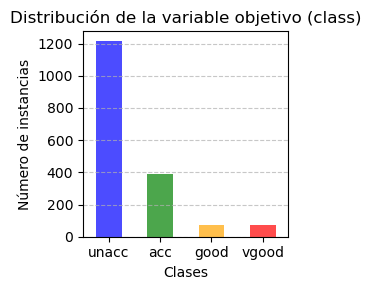

({'Número de clases': 4,
  'Clases': array(['unacc', 'acc', 'vgood', 'good'], dtype=object),
  'Número de instancias en total': 1750,
  'Número de instancias por clase': class
  unacc    1215
  acc       390
  good       75
  vgood      70
  Name: count, dtype: int64,
  'Número de atributos de entrada': 6,
  'Atributos de entrada y sus tipos': {'Buying': dtype('O'),
   'Maintenance': dtype('O'),
   'Doors': dtype('O'),
   'Person': dtype('O'),
   'lug_boot': dtype('O'),
   'safety': dtype('O')},
  '¿Hay algún valor de atributo desconocido?': Buying         0
  Maintenance    0
  Doors          0
  Person         0
  lug_boot       0
  safety         0
  class          0
  dtype: int64},
 class
 unacc    1215
 acc       390
 good       75
 vgood      70
 Name: count, dtype: int64)

In [ ]:
# Número de clases de la variable objetivo
num_clases = df['class'].nunique()
clases = df['class'].unique()

# Número de instancias en total
num_instancias = df.shape[0]

# Número de instancias pertenecientes a cada clase
instancias_por_class = df['class'].value_counts()

# Número de atributos de entrada, su significado y tipo
atributos_entrada = df.drop(columns=['class']).columns
tipos_atributos = df.drop(columns=['class']).dtypes

# Verificacion de atributos desconocidos o valores faltantes
valores_desc = df.isnull().sum()

# Resultados
resultados = {
    "Número de clases": num_clases,
    "Clases": clases,
    "Número de instancias en total": num_instancias,
    "Número de instancias por clase": instancias_por_class,
    "Número de atributos de entrada": len(atributos_entrada),
    "Atributos de entrada y sus tipos": tipos_atributos.to_dict(),
    "¿Hay algún valor de atributo desconocido?": valores_desc 
}
 #Gráfico acerca de la Distribución de la variable objetivo
plt.figure(figsize=(3, 3))  
instancias_por_class.plot(kind='bar', color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.title("Distribución de la variable objetivo (class)")
plt.xlabel("Clases")
plt.ylabel("Número de instancias")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


resultados, instancias_por_class

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [4]:

# Separacion de atributos de entrada (X) y columna objetivo (y)
X = df.drop(columns=["class"]) 
y = df["class"]

# Tranformacion de variables categoricas en valores numericos.
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Tranformacion de la columna objetivo donde las etiquetas de 'clase' sean valores numericas
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [5]:
# Division 80% y 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Ajuste de los modelos de clasificación propuestos

In [30]:
#Código de ajuste del modelo de clasificación 1
# Aqui se define el modelo Bagging
bagging_model = BaggingClassifier(
    n_estimators=50,                          # Número de modelos en el ensamble
    random_state=42                           # Reproducibilidad, para asegurar una buena distribucion aleatoria                                       
)
#Ajuste del modelo a los datos de entrenamiento
bagging_model.fit(X_train, y_train)

BaggingClassifier(n_estimators=50, random_state=42)

In [ ]:
#Código de ajuste del modelo de clasificación 2
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,         # Número de clasificacdores base que se entrenan en subconjuntos del dataset
    max_depth=10,             # Profundidad máxima de los árboles 
    random_state=42           # Reproducibilidad
)
# Ajuste del modelo RF con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=43)

## Evaluación de cada modelo

In [25]:
# Evaluación del modelo de clasificación 1 (Bagging)

# Predicciones
y_pred_bagging = bagging_model.predict(X_test)

# Métricas
correct_bagging = (y_test == y_pred_bagging).sum()
incorrect_bagging = (y_test != y_pred_bagging).sum()
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Matriz de Confusión
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

# Calculos de TP Rate y FP Rate por clase
TP_bagging = conf_matrix_bagging.diagonal()  # Verdaderos positivos (diagonal de la matriz)
FP_bagging = conf_matrix_bagging.sum(axis=0) - TP_bagging  # Falsos positivos por columna
TP_rate_bagging = TP_bagging / conf_matrix_bagging.sum(axis=1)  # Tasa de TP
FP_rate_bagging = FP_bagging / conf_matrix_bagging.sum(axis=1)  # Tasa de FP

#Mostrar los Resultados
print("Bagging Classifier Report:")
print(classification_report(y_test, y_pred_bagging, target_names=target_encoder.classes_))
print(f"Instancias clasificadas correctamente: {correct_bagging}")
print(f"Instancias clasificadas incorrectamente: {incorrect_bagging}")
print(f"Exactitud (Accuracy): {accuracy_bagging:.2f}")
print(f"TP Rate: {TP_rate_bagging}")
print(f"FP Rate: {FP_rate_bagging}")
print("Matriz de Confusión:")
print(conf_matrix_bagging)

Bagging Classifier Report:
              precision    recall  f1-score   support

         acc       0.97      0.88      0.93        78
        good       0.82      0.93      0.88        15
       unacc       0.98      1.00      0.99       243
       vgood       0.93      1.00      0.97        14

    accuracy                           0.97       350
   macro avg       0.93      0.95      0.94       350
weighted avg       0.97      0.97      0.97       350

Instancias clasificadas correctamente: 339
Instancias clasificadas incorrectamente: 11
Exactitud (Accuracy): 0.97
TP Rate: [0.88461538 0.93333333 0.99588477 1.        ]
FP Rate: [0.02564103 0.2        0.02057613 0.07142857]
Matriz de Confusión:
[[ 69   3   5   1]
 [  1  14   0   0]
 [  1   0 242   0]
 [  0   0   0  14]]


In [27]:
#  Evaluación del modelo de clasificación 2 (Random forest)

# Predecciones
y_pred_rf = rf_model.predict(X_test)

# Métricas
correct_rf = (y_test == y_pred_rf).sum()
incorrect_rf = (y_test != y_pred_rf).sum()
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Matriz de Confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calcular TP Rate y FP Rate por clase
TP_rf = conf_matrix_rf.diagonal()  # Verdaderos positivos
FP_rf = conf_matrix_rf.sum(axis=0) - TP_rf  # Falsos positivos
TP_rate_rf = TP_rf / conf_matrix_rf.sum(axis=1)  # Tasa de TP
FP_rate_rf = FP_rf / conf_matrix_rf.sum(axis=1)  # Tasa de FP

# Impresion de Resultados
print("\nRandom Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_encoder.classes_))
print(f"Instancias clasificadas correctamente: {correct_rf}")
print(f"Instancias clasificadas incorrectamente: {incorrect_rf}")
print(f"Exactitud (Accuracy): {accuracy_rf:.2f}")
print(f"TP Rate: {TP_rate_rf}")
print(f"FP Rate: {FP_rate_rf}")
print("Matriz de Confusión:")
print(conf_matrix_rf)


Random Forest Classifier Report:
              precision    recall  f1-score   support

         acc       0.93      0.87      0.90        78
        good       0.80      0.80      0.80        15
       unacc       0.97      0.99      0.98       243
       vgood       1.00      1.00      1.00        14

    accuracy                           0.96       350
   macro avg       0.93      0.92      0.92       350
weighted avg       0.96      0.96      0.96       350

Instancias clasificadas correctamente: 335
Instancias clasificadas incorrectamente: 15
Exactitud (Accuracy): 0.96
TP Rate: [0.87179487 0.8        0.99176955 1.        ]
FP Rate: [0.06410256 0.2        0.02880658 0.        ]
Matriz de Confusión:
[[ 68   3   7   0]
 [  3  12   0   0]
 [  2   0 241   0]
 [  0   0   0  14]]


## Comparación del desempeño de modelos

In [ ]:
# Diccionario con las métricas de Bagging
metrics_bagging = {
    'Modelo': 'Bagging',
    'Correctas': correct_bagging,
    'Incorrectas': incorrect_bagging,
    'Accuracy': accuracy_bagging,
    'TP Rate': TP_rate_bagging.mean(),  # Promedio de TP Rate
    'FP Rate': FP_rate_bagging.mean(),  # Promedio de FP Rate
}

# Diccionario con las métricas de Random Forest
metrics_rf = {
    'Modelo': 'Random Forest',
    'Correctas': correct_rf,
    'Incorrectas': incorrect_rf,
    'Accuracy': accuracy_rf,
    'TP Rate': TP_rate_rf.mean(),  # Promedio de TP Rate
    'FP Rate': FP_rate_rf.mean(),  # Promedio de FP Rate
}
# DataFrame con las métricas
metrics_df = pd.DataFrame([metrics_bagging, metrics_rf])

# Impresion de Resultados
print("=== Comparación de Métricas ===")
print(metrics_df)

=== Comparación de Métricas ===
          Modelo  Correctas  Incorrectas  Accuracy   TP Rate   FP Rate
0        Bagging        342            8  0.977143  0.947436  0.076325
1  Random Forest        333           17  0.951429  0.911657  0.094290


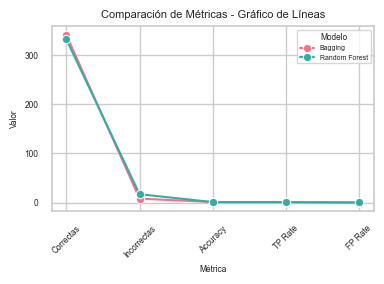

In [ ]:
# DataFrame con las métricas para graficar
metrics_df_melted = metrics_df.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

# Estilo general para los gráficos
sns.set(style="whitegrid")

# --- Gráfico de Líneas ---
plt.figure(figsize=(4, 3))  # tamaño de la figura
sns.lineplot(data=metrics_df_melted, x='Métrica', y='Valor', hue='Modelo', marker='o', palette='husl')
plt.title('Comparación de Métricas - Gráfico de Líneas', fontsize=8)  # Título 
plt.ylabel('Valor', fontsize=6)  # Etiqueta del eje y 
plt.xlabel('Métrica', fontsize=6)  # Etiqueta del eje x 
plt.xticks(rotation=45, fontsize=6)  # Rotación y tamaño para los ticks del eje x
plt.yticks(fontsize=6)  # tamaño de los ticks del eje y
plt.legend(title='Modelo', fontsize=5, title_fontsize=6)  # Leyenda 
plt.tight_layout() 
plt.show()

